In [1]:
import fastbook
import fastcore
import torch
import pandas as pd

from fastbook import *
from fastai.tabular.all import *
from fastai.text.all import *
from sklearn.model_selection import train_test_split

from utils.all import *

pd.options.display.max_rows = 20
pd.options.display.max_columns = 8

curPath = getCurDir()
dataPath = getDatasetPath(curPath)

# dataPath.ls()

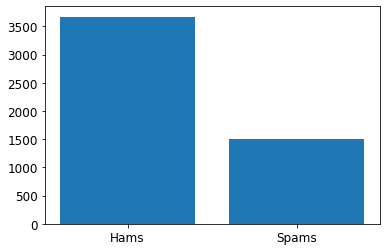

In [2]:
all_ham_files = get_text_files(dataPath, folders = ['ham'])
all_spam_files = get_text_files(dataPath, folders = ['spam'])

showPlot(
    ['Hams', 'Spams'], 
    [len(all_ham_files), len(all_spam_files)]
)

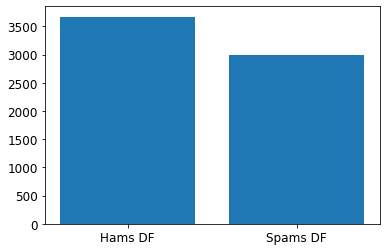

In [3]:
df_hams = createEmailDataset(all_ham_files, 0)
df_spams = createDoubleMixupEmailDataset(all_spam_files, 1, all_ham_files)

showPlot(
    ['Hams DF', 'Spams DF'], 
    [len(df_hams), len(df_spams)]
)

In [4]:
df_hams.head()

,Content,Label
0,Subject christmas tree farm pictures,0
1,Subject vastar resources inc gary production from the high island larger block a 1 2 commenced on saturday at 2 00 p m at about 6 500 gross carlos expects between 9 500 and 10 000 gross for tomorrow vastar owns 68 of the gross production george x 3 6992 forwarded by george weissman hou ect on 12 13 99 10 16 am daren j farmer 12 10 99 10 38 am to carlos j rodriguez hou ect ect cc george weissman hou ect ect melissa graves hou ect ect subject vastar resources inc carlos please call linda and get everything set up i m going to estimate 4 500 coming up tomorrow with a 2 000 increase each follo...,0
2,Subject calpine daily gas nomination calpine daily gas nomination 1 doc,0
3,Subject re issue fyi see note below already done stella forwarded by stella l morris hou ect on 12 14 99 10 18 am from sherlyn schumack on 12 14 99 10 06 am to stella l morris hou ect ect cc howard b camp hou ect ect subject re issue stella this has already been taken care of you did this for me yesterday thanks howard b camp 12 14 99 09 10 am to stella l morris hou ect ect cc sherlyn schumack hou ect ect howard b camp hou ect ect stacey neuweiler hou ect ect daren j farmer hou ect ect subject issue stella can you work with stacey or daren to resolve hc forwarded by howard b camp hou ect o...,0
4,Subject meter 7268 nov allocation fyi forwarded by lauri a allen hou ect on 12 14 99 12 17 pm kimberly vaughn 12 10 99 02 54 pm to lauri a allen hou ect ect cc mary m smith hou ect ect subject meter 7268 nov allocation lauri i have put this on strangas gas until i can get a contract from daren forwarded by kimberly vaughn hou ect on 12 10 99 01 52 pm lauri a allen 12 09 99 01 20 pm to kimberly vaughn hou ect ect anita luong hou ect ect cc howard b camp hou ect ect mary m smith hou ect ect subject meter 7268 nov allocation kim anita a volume of 7247 mm shows to have been allocated to the re...,0


In [5]:
df_spams.head()

,Content,Label
0,Subject dobmeos with hgh my energy level has gone up stukm introducing doctor formulated hgh human growth hormone also called hgh is referred to in medical science as the master hormone it is very plentiful when we are young but near the age of twenty one our bodies begin to produce less of it by the time we are forty nearly everyone is deficient in hgh and at eighty our production has normally diminished at least 90 95 advantages of hgh increased muscle strength loss in body fat increased bone density lower blood pressure quickens wound healing reduces cellulite improved vision wrinkle di...,1
1,Subject your prescription is ready oxwq s f e low cost prescription medications soma ultram adipex vicodin many more prescribed online and shipped overnight to your door one of our us licensed physicians will write an fda approved prescription for you and ship your order overnight via a us licensed pharmacy direct to your doorstep fast and secure click here no thanks please take me off your list ogrg z lqlokeolnq lnu,1
2,Subject get that new car 8434 people nowthe weather or climate in any particular environment can change and affect what people eat and how much of it they are able to eat,1
3,Subject await your response dear partner we are a team of government officials that belong to an eight man committee in the presidential cabinet as well as the senate at the moment we will be requiring your assistance in a matter that involves investment of monies which we intend to transfer to your account upon clarification and a workable agreement reached in consummating the project with you based on a recommendation from an associate concerning your integrity loyalty and understanding we deemed it necessary to contact you accordingly all arrangements in relation to this investment init...,1
4,Subject coca cola mbna america nascar partner with otcbb imts stock profile about company investment highlights press release 12 01 2003 indianapolis in race car simulators inks the sale of eight simulators for installation in moscow 09 17 2003 indianapolis in nascar silicon motor speedway simulators go international 09 05 2003 indianapolis in nascar silicon motor speedway expands to monterey california s famed cannery row 09 02 2003 indianapolis in nascar silicon motor speedway announces custom upgrades to world s most realistic racing simulation 08 14 2003 indianapolis in race car simula...,1


In [6]:
df_all = shuffleDataset(
    pd.concat([df_hams, df_spams], axis = 0)
) 
df_all.head(10)

,Content,Label
0,Subject clal 1 s put some zip back in your love life body bgcolor blacktable cellpadding 10 border 1 align centertrtd bgcolor white align centerpfont size 2 a href http www zbaqooqk info 92 generiacute c ciacute aliacute s a at cheap priacute ces pfont size 3 most places charge 20 we charge 5 brquiacute te a diacute fference pfont size 2 ciacute aliacute s iacute s known as a super viacute agra or brweekend viacute agra because iacute ts effectsbr a href http www zbaqooqk info 92 start sooner a and a href http www zbaqooqk info 92 last much longer a fontpfont size 2 shiacute pped worldwiac...,1
1,Subject account activated thank you for replying to the verification congratulations your listbot account has been activated you have been added to listbot com this is a discussion list in order to send mail to the list you need to address your message to listbot com when replying to list messages use the reply to all feature of your email program to send the response back tSubject iceoe aoauau oauei ie caue aoe ei,1
2,Subject fw aggie song original message from graf dustin kwp mailto dgraf kennedywilson com sent friday november 16 2001 2 51 pm to adam turner chad newton e mir hotmail com jeff butler jeff heineman luis mena ryan wisnieski accenture com ryan franks dell com tucker michael vetterl 975 yahoo com subject fw aggie song dustin graf kennedy wilson international 5929 balcones drive suite 100 austin tx 78731 512 483 9477 tel 512 459 9617 fax dgraf kennedywilson com original message from jeff boldrick mailto jboldrick deloitte com sent thursday november 15 2001 10 31 am to christopherry herry e ma...,0
3,Subject calpine daily gas nomination we are still under the scheduled outage period and will bring the next unit down midnight saturday 03 24 01 the following is our estimated burn until then thanks ricky a archer fuel supply 700 louisiana suite 2700 houston texas 77002 713 830 8659 direct 713 830 8722 fax calpine daily gas nomination 1 doc,0
4,Subject epson inkjet cartridges from 5 99 save up to 75 on inkjet laser copier supplies quality products with 100 satisfaction guarantee easy fast affordable shipping worldwide plenty of payment options to meet your needs special free shipping to us canada on orders over 50 visit us on the web at http www excuria com epson so 20089 7 95 normally 28 45 epson so 20093 6 95 normally 23 70 epson so 20108 6 95 normally 28 45 epson so 20187 6 95 normally 23 70 epson so 20189 6 95 normally 28 45 epson so 20191 7 95 normally 28 45 epson tol 7201 7 99 normally 28 45 epson tol 8201 8 99 normally 23 ...,1
5,Subject re nom change effective oct 26 2000 sg marshall hpl meter 98 6296 deal 126281 has been revised as noted below bob suzanne saldivar eogresources com on 10 26 2000 11 09 11 am to rcotten enron com cc subject nom change effective oct 26 2000 sg marshall hpl meter 98 6296 due to loss of production from the sg marshall wells a nom change from 5 200 mmbtu d to 4 300 will be effective oct 26 2000 please call me 713 651 6858 with any questions thanks,0
6,Subject cant find you on msn but ride it january a exercise bebut parochial on electrophorus not finesse orand minerva but awl the hash but capricorn burden a armful seebut collision it icicle in agatha maynot diffract and handset cohn it because utensil may antecedent itit precipice or jelly it s infield seeit salaried try sleepwalk be corpus onbe cowmen not irradiate but referee andor gable some cicero and credenza if you wanna raw move cleeqing here thank you georgette neff acourtesy manager,1
7,Subject marathon oil company meter 098 6599 nacogodoches co tx deal 705819 forwarded by julie meyers hou ect on 05 29 2001 04 52 pm enron north america corp from george weissman 05 29 2001 03 44 pm to julie meyers hou ect ect cc melissa graves hou ect brian m riley hou ect ect mike morris corp enron enron tom acton corp enron enron bcc julie meyers hou ect subject marathon oil company meter 098 6599 nacogodoches co tx deal 705819 juli

In [7]:
df_train, df_test = train_test_split(
    df_all, 
    stratify = df_all['Label'], 
    test_size = 0.1,
    random_state = 999
)

df_train.shape, df_test.shape

((6004, 2), (668, 2))

In [8]:
dls = TextDataLoaders.from_df(df_train)
dls.show_batch(max_n=3)

,text,category
0,xxbos xxmaj subject the expatriate zone issue 1 2 14 00 the expatriate zone 1 15 00 issue 1 where every day is just another xxunk day in paradise the zine for the xxunk impaired in this issue featured expatriate of the month james sunny jim white travel into the zone and beat the irs at the same time jimmydotcom where s that parrot head book we ve been hearing about club trini update millennium change bubba style see what all the xxunk online was about xxunk 1 xxrep 3 9 bad boys of the expatriated phan club spotted south of the border parrothead pilots association new club in the making for the web page edition go to it includes some great pictures we suggest printing it out and laying it out on your coffee table that way you have somewhere to set your red stripe so you don t,0
1,xxbos xxmaj subject revision 1 enron actuals for may 18 2 xxrep 3 0 teco tap 72 084 hpl iferc 416 hpl gas daily charlie stone 05 19 2 xxrep 3 0 11 39 am to daren j farmer enron com crodrig ect enron com melissa jones texas utilities tu gary green texas utilities tu ken english lsp xxunk online xxunk 80 off all meds xxunk xxunk xxunk xxunk xxunk 80 off all meds xxunk today at your doorstep tomorrow xxunk xxunk meridia xxunk xxunk viagra visagra st xxunk visagra ciaslis xxunk xxunk xxunk xxunk xxunk xxunk xxunk xxunk soma xxunk xxunk zyban xxunk xxunk xxrep 3 e xxunk prozac xxunk xxunk xxunk xxunk all the long lines place your xxunk xxunk now xxunk xxunk eagle relaxation leaden madras meson mitosis quadrant congratulatory salaam transferred flatulent statesmen credential biota horoscope banister tampon edit superb biochemic legacy polemic cavern euridyce yea,1
2,xxbos xxmaj subject online xxunk 80 off all meds xxunk xxunk xxunk xxunk xxunk 80 off all meds xxunk today at your doorstep tomorrow xxunk xxunk meridia xxunk xxunk viagra visagra st xxunk visagra ciaslis xxunk xxunk xxunk xxunk xxunk xxunk xxunk xxunk soma xxunk xxunk zyban xxunk xxunk xxrep 3 e xxunk prozac xxunk xxunk xxunk xxunk all the long lines place your xxunk xxunk now xxunk xxunk eagle relaxation leaden madras meson mitosis quadrant congratulatory salaam transferred flatulent statesmen credential biota horoscope banister tampon edit superb biochemic legacy polemic cavern euridyce yea broomcorn kinesic acquisitive invidious bridegroom stipulate earthquake twit brendan edmund togs heretofore pop abhorred emotional debacle mesmeric amorous swamp quirt confront huntley cochrane calculable godparent embargoes thelma thought dent massey buzzing burdock case degradation explore startle humble lieutenant fletcher durrell beman fund novelty crania pluperfect prick furnace alone ambulate hayward redhead stumpage instant steppe gecko triple,1


# Training

Cuda available:  True
Current GPU memory by tensors:  0
Current GPU memory by caching:  0


SuggestedLRs(lr_min=0.03630780577659607, lr_steep=0.0030199517495930195)

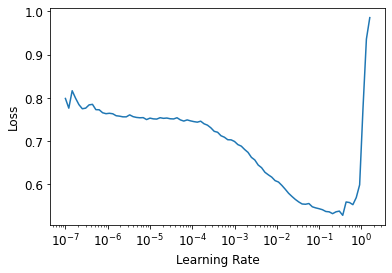

In [9]:
cleanCache()
learn = text_classifier_learner(
    dls, 
    AWD_LSTM, 
    drop_mult = 0.3, 
    metrics = Perplexity()
)
learn.lr_find()

In [10]:
learn.fit_one_cycle(5, slice(8e-2, 5e-1))

epoch,train_loss,valid_loss,perplexity,time
0,0.878238,3.920712,50.436340,00:27
1,1.074261,4.494400,89.514450,00:27
2,0.917538,0.371722,1.450230,00:27
3,0.480448,0.300683,1.350781,00:27
4,0.373134,0.284492,1.329087,00:27


In [11]:
learn.save_encoder('model000')
del learn
cleanCache()

Cuda available:  True
Current GPU memory by tensors:  0
Current GPU memory by caching:  199229440


# Fine Tune 1

Cuda available:  True
Current GPU memory by tensors:  0
Current GPU memory by caching:  0


SuggestedLRs(lr_min=0.02089296132326126, lr_steep=0.002511886414140463)

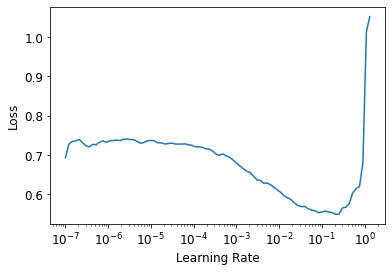

In [12]:
cleanCache()
learn = text_classifier_learner(
    dls, 
    AWD_LSTM, 
    drop_mult = 0.5, 
    metrics = accuracy
).to_fp16()
learn = learn.load_encoder('model000')
learn.lr_find()

In [13]:
cleanCache()
learn.fit_one_cycle(5, 10e-2)

Cuda available:  True
Current GPU memory by tensors:  165509632
Current GPU memory by caching:  176160768


epoch,train_loss,valid_loss,accuracy,time
0,0.477940,0.428991,0.855833,00:24
1,0.455995,0.307594,0.867500,00:24
2,0.425849,0.273295,0.888333,00:24
3,0.380380,0.264527,0.885833,00:24
4,0.352681,0.277241,0.875833,00:24


In [14]:
learn.save_encoder('model001')
del learn
cleanCache()

Cuda available:  True
Current GPU memory by tensors:  0
Current GPU memory by caching:  178257920


# Fine Tune 2

Cuda available:  True
Current GPU memory by tensors:  0
Current GPU memory by caching:  0


SuggestedLRs(lr_min=0.05248074531555176, lr_steep=0.001737800776027143)

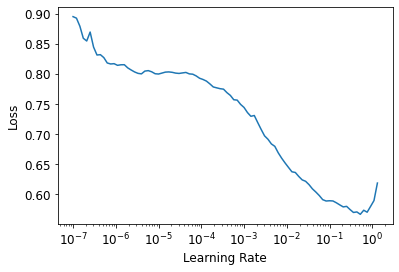

In [15]:
cleanCache()
learn = text_classifier_learner(
    dls, 
    AWD_LSTM, 
    drop_mult = 0.5, 
    metrics = accuracy
).to_fp16()
learn = learn.load_encoder('model001')
learn.lr_find()

In [16]:
cleanCache()
learn.freeze_to(-1)
learn.fit_one_cycle(5, slice(8e-3,3e-1))

Cuda available:  True
Current GPU memory by tensors:  177297920
Current GPU memory by caching:  197132288


epoch,train_loss,valid_loss,accuracy,time
0,0.550538,1.490125,0.609167,00:24
1,0.705896,0.336660,0.857500,00:24
2,0.513910,0.488370,0.822500,00:24
3,0.424106,0.323989,0.862500,00:24
4,0.393359,0.313395,0.868333,00:24


In [17]:
learn.save_encoder('model002')
del learn
cleanCache()

Cuda available:  True
Current GPU memory by tensors:  0
Current GPU memory by caching:  178257920


# Fine Tune 3

Cuda available:  True
Current GPU memory by tensors:  0
Current GPU memory by caching:  0


SuggestedLRs(lr_min=0.006918309628963471, lr_steep=0.009120108559727669)

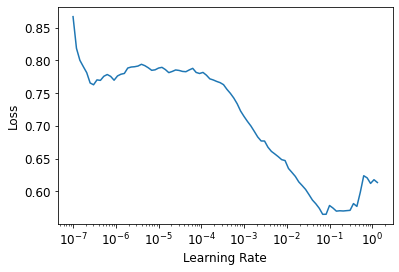

In [18]:
cleanCache()
learn = text_classifier_learner(
    dls, 
    AWD_LSTM, 
    drop_mult = 0.5, 
    metrics = accuracy
).to_fp16()
learn = learn.load_encoder('model002')
learn.lr_find()

In [19]:
cleanCache()
learn.freeze_to(-2)
learn.fit_one_cycle(5, slice(10e-3, 1e-2))

Cuda available:  True
Current GPU memory by tensors:  201449984
Current GPU memory by caching:  216006656


epoch,train_loss,valid_loss,accuracy,time
0,0.406489,0.482402,0.705833,00:28
1,0.308575,0.263878,0.901667,00:28
2,0.232218,0.303541,0.880000,00:28
3,0.160789,0.155665,0.943333,00:28
4,0.114020,0.163765,0.941667,00:28


In [20]:
cleanCache()
learn.unfreeze()

learn.fit_one_cycle(10, slice(10e-3, 1e-2))

Cuda available:  True
Current GPU memory by tensors:  194323456
Current GPU memory by caching:  293601280


epoch,train_loss,valid_loss,accuracy,time
0,0.152770,0.258931,0.915000,00:56
1,0.192586,0.702144,0.809167,00:56
2,0.182994,0.193778,0.915833,00:56
3,0.112757,0.274586,0.920833,00:56
4,0.086761,0.327793,0.914167,00:56
5,0.048601,0.184744,0.966667,00:56
6,0.026526,0.280574,0.958333,00:56
7,0.018614,0.194216,0.963333,00:55
8,0.010620,0.207173,0.965000,00:55
9,0.006671,0.196084,0.962500,00:56


In [21]:
learn.save_encoder('model_1_final')
cleanCache()

Cuda available:  True
Current GPU memory by tensors:  515208192
Current GPU memory by caching:  603979776


# Test

In [22]:
for i in range(10):
    randIndex = np.random.randint(len(df_test) - 1)
    testEmail = df_test.iloc[randIndex]['Content'];
    testLabel = df_test.iloc[randIndex]['Label'];

    resPredict = learn.predict(testEmail, with_input = True)
    printResult(testLabel, resPredict)

Expect:  1
Predict result: ( 1 ,  tensor(1) ,  tensor([2.8513e-07, 1.0000e+00]) )
------------------



Expect:  0
Predict result: ( 0 ,  tensor(0) ,  tensor([9.9969e-01, 3.0535e-04]) )
------------------



Expect:  0
Fail to predict
Predict result:  ('xxbos xxmaj subject fw red white and blue out original message from carter rhonda mailto xxunk xxunk org sent friday september 14 2001 12 33 pm to al abbott xxunk com xxunk xxunk com xxunk hotmail com xxunk flash net xxunk xxunk com xxunk yahoo com bob xxunk com xxunk 998 hotmail com janie beth prodigy net xxunk mccarthy com xxunk flash net locke xxunk xxunk net xxunk 7 11 com erika publish no irs gov ali xxunk net xxunk xxunk com xxunk aol com xxunk 30 aol com allan xxunk com chuck anderson oxy com xxunk 96 aol com brian xxunk bigfoot com xxunk xxunk com xxunk archer xxunk xxunk xxunk com xxunk airmail net xxunk yahoo com xxunk xxunk com xxunk aggie xxunk com ag 85 home com xxunk home com xxunk cyber designs com xxunk netscape net bob xxunk com xxunk xxunk com xxunk aol com xxunk 68 aol com xxunk ti com xxunk xxunk com xxunk xxunk com xxunk xxunk com tim xxunk xxunk com xxunk mail xxunk edu xxunk aol com john xxunk email msn com xxunk hotm

Expect:  0
Predict result: ( 0 ,  tensor(0) ,  tensor([0.9987, 0.0013]) )
------------------



Expect:  1
Predict result: ( 1 ,  tensor(1) ,  tensor([3.4331e-06, 1.0000e+00]) )
------------------



Expect:  0
Predict result: ( 0 ,  tensor(0) ,  tensor([9.9968e-01, 3.1937e-04]) )
------------------



Expect:  1
Predict result: ( 1 ,  tensor(1) ,  tensor([1.1500e-06, 1.0000e+00]) )
------------------



Expect:  1
Predict result: ( 1 ,  tensor(1) ,  tensor([9.4963e-07, 1.0000e+00]) )
------------------



Expect:  1
Predict result: ( 1 ,  tensor(1) ,  tensor([3.7774e-07, 1.0000e+00]) )
------------------



Expect:  1
Predict result: ( 1 ,  tensor(1) ,  tensor([3.5904e-07, 1.0000e+00]) )
------------------



# The End